# A beginner's guide to Aliexpress data scraping and mining

http://blog.hanxiaogang.com/2017-07-29-aliexpress/ 

In [2]:
# libraries
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')

In [6]:
df = pd.read_csv('C:\\Users\\maeli\\Documents\\GitHub\\web_scrapping_aliexpress\\code\\reviews.csv', sep=";")
df

,anonymous,buyerCountry,buyerEval,buyerFeedback,buyerGender,buyerHeadPortrait,buyerName,evalDate,image,logistics,skuInfo,thumbnail
0,False,US,100,"Nice product, fast delivery. I totally recomme...",NaN,NaN,G**a A.,03 Apr 2018,NaN,ePacket,Color:21cm dark coffee,NaN
1,False,RU,100,На вид очень симпатичные. Пока не пыталась исп...,F,https://ae01.alicdn.com/kf/UT88Bj.XK8XXXagOFbX...,A*******a N.,29 Mar 2018,https://ae01.alicdn.com/kf/UTB8zEu6v._4iuJk43F...,China Post Ordinary Small Packet Plus,Color:15cm coffee,https://ae01.alicdn.com/kf/UTB8zEu6v._4iuJk43F...
2,False,RU,100,Посылка пришла за 28 дней. Все как на картинке...,F,https://ae01.alicdn.com/kf/HTB1bQP5JpXXXXaYXFX...,A******a K.,09 Dec 2017,https://ae01.alicdn.com/kf/UTB8hWTaembIXKJkSae...,AliExpress Saver Shipping,Color:light coffee,https://ae01.alicdn.com/kf/UTB8hWTaembIXKJkSae...
3,False,RU,100,"В Томск пришла посылка за 30 дней, в использов...",F,https://ae01.alicdn.com/kf/UT8_DdpX38aXXagOFbX...,A*******a P.,07 Mar 2018,https://ae01.alicdn.com/kf/UTB8Cj18vNHEXKJk43J...,SunYou Economic Air Mail,Color:15cm coffee,https://ae01.alicdn.com/kf/UTB8Cj18vNHEXKJk43J...
4,False,RU,60,"Непонятная штука, даже видео посмотрела на юту...",F,https://ae01.alicdn.com/kf/UT8Wt5rXqNbXXagOFbX...,L****v R.,03 Apr 2018,https://ae01.alicdn.com/kf/UTB8_RCYxXfFXKJk43O...,AliExpress Saver Shipping,Color:24.5cm E,https://ae01.alicdn.com/kf/UTB8_RCYxXfFXKJk43O...
5,True,FR,100,NaN,NaN,NaN,Client AliExpress,10 Apr 2018,NaN,China Post Ordinary Small Packet Plus,Color:21cm golden,NaN
6,False,RU,100,Хорошая заколка. Жесткая. Держит хорошо. Но бы...,M,https://gw.alicdn.com/tps/TB1CjX4LXXXXXbSXFXXX...,Y***y L.,05 Apr 2018,https://ae01.alicdn.com/kf/UTB8D9AIwo_4iuJk43F...,China Post Registered Air Mail,Color:24.5cm A,https://ae01.alicdn.com/kf/UTB8D9AIwo_4iuJk43F...
7,False,RU,80,"Посылка пришла за месяц, не отслеживплась. Пок...",F,https://ae01.alicdn.com/kf/UTB8Z8HfemnEXKJk43U...,O**a S.,26 Mar 2018,https://ae01.alicdn.com/kf/UTB8o0lywtoSdeJk43O...,China Post Ordinary Small Packet Plus,Color:21cm light coffee,https://ae01.alicdn.com/kf/UTB8o0lywtoSdeJk43O...
8,False,ES,100,"Bien embalado, color correcto, envío rapidísim...",NaN,https://ae01.alicdn.com/kf/UT8D_QeX2hXXXagOFbX...,E*****a V.,08 Nov 2017,https://ae01.alicdn.com/kf/UTB8kKCqdDzIXKJkSaf...,AliExpress Saver Shipping,Color:golden,https://ae01.alicdn.com/kf/UTB8kKCqdDzIXKJkSaf...
9,False,RU,80,NaN,M,https://ae01.alicdn.com/kf/UT8Vur4X68bXXagOFbX...,S****y Y.,10 Apr 2018,NaN,SunYou Economic Air Mail,Color:15cm golden,NaN


In [7]:
from textblob import TextBlob

In [28]:
def translate(x):
    string = TextBlob(str(x))
    langue = string.detect_language()
    if langue == "en":
        return x
    else :
        try : 
            return str(string.translate(to= "en"))
        except:
            return None
def get_polarity(x):
    string = TextBlob(str(x))
    return tuple(string.sentiment)[0]

def get_subjectivity(x):
    string = TextBlob(str(x))
    return tuple(string.sentiment)[1]

In [13]:
df["buyerFeedback"] = df["buyerFeedback"].apply( lambda x: translate(x))

In [29]:
df["buyerFeedbackPolarity"] = df["buyerFeedback"].apply( lambda x: get_polarity(x))
df["buyerFeedbackSubjectivity"] = df["buyerFeedback"].apply( lambda x: get_subjectivity(x))

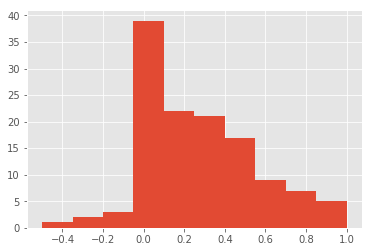

In [32]:
df["buyerFeedbackPolarity"].hist()
df["buyerFeedbackSubjectivity"].hist()

In [35]:
# Date 
from dateutil.relativedelta import relativedelta
from datetime import datetime
date_format = "%d %b %Y"

def day_delta(d):
    now = datetime.now()
    d = datetime.strptime(d,date_format)
    return relativedelta(now,d).days

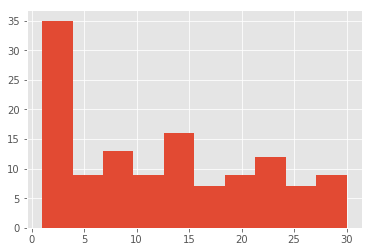

In [38]:
df["time_delta"] = df.evalDate.apply( lambda x: day_delta(x))
df.time_delta.hist()

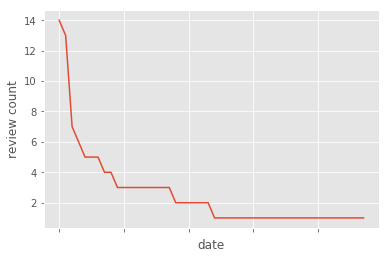

In [46]:
vc = df['evalDate'].value_counts()
ax = vc.plot()
ax.set_xlabel("date")
ax.set_ylabel("review count")
plt.savefig('aliexpress-plot-review.png')

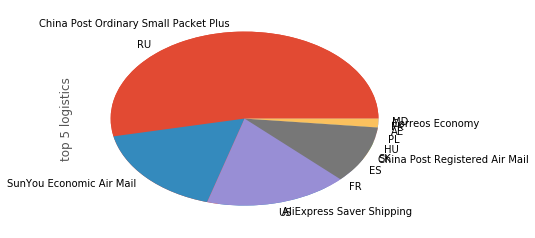

In [47]:
vc = df['buyerCountry'].value_counts()[:10]
ax = vc.plot(kind='pie')
ax.set_ylabel("top 10 buyer countries")
plt.savefig('aliexpress-plot-countries.png')


vc = df['logistics'].value_counts()[:5]
ax = vc.plot(kind='pie')
ax.set_ylabel("top 5 logistics")
plt.savefig('aliexpress-plot-logistics.png')


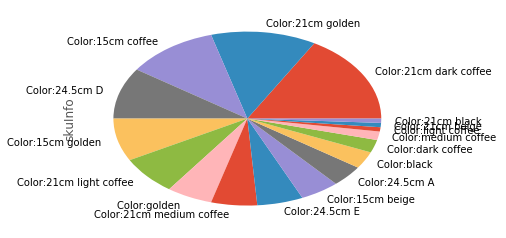

In [48]:
vc = df['skuInfo'].value_counts()
ax = vc.plot(kind='pie')
ax.set_ylabel("skuInfo")
plt.savefig('aliexpress-plot-skuinfo.png')